In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
material= "/gate/geometry/setMaterialDatabase ../data/GateMaterials.db \n"

world=  """
/gate/world/geometry/setXLength 2. m 
/gate/world/geometry/setYLength 2. m 
/gate/world/geometry/setZLength 2. m 
/gate/world/setMaterial Air 
/gate/world/vis/setVisible 0  \n"""

detector="""
/gate/world/daughters/name CTscanner 
/gate/world/daughters/insert box 
/gate/CTscanner/setMaterial CdTe
/gate/CTscanner/geometry/setXLength 14 mm 
/gate/CTscanner/geometry/setYLength 14 mm 
/gate/CTscanner/geometry/setZLength 1 mm 
/gate/CTscanner/vis/forceSolid 
/gate/CTscanner/vis/setColor yellow 
/gate/CTscanner/placement/setTranslation 0. 0. 7. cm \n"""

phatom= """//gate/world/daughters/name Phantom
/gate/world/daughters/insert box
/gate/Phantom/placement/setTranslation 0.0 0.0 0. cm 
/gate/Phantom/setMaterial PMMA
/gate/Phantom/geometry/setXLength 2. cm
/gate/Phantom/geometry/setYLength 2. cm
/gate/Phantom/geometry/setZLength 3.17478 cm
/gate/Phantom/vis/forceWireframe
/gate/Phantom/vis/setColor red
/gate/Phantom/vis/setVisible 1 \n
"""

Cristales="""
#Cristales 0.54
/gate/Phantom/daughters/name Micro1
/gate/Phantom/daughters/insert sphere
/gate/Micro1/setMaterial ALO
/gate/Micro1/geometry/setRmax 0.54 mm
/gate/Micro1/geometry/setRmin 0 mm
/gate/Micro1/vis/forceSolid
/gate/Micro1/vis/setColor blue
/gate/Micro1/vis/setVisible 1
/gate/Micro1/repeaters/insert linear
/gate/Micro1/linear/setRepeatNumber  3
/gate/Micro1/linear/setRepeatVector  2.5  0 0. mm
/gate/Micro1/linear/autoCenter  false
/gate/Micro1/placement/setTranslation -2.5 +3. 0. mm

#Cristales 0.40
/gate/Phantom/daughters/name Micro5
/gate/Phantom/daughters/insert sphere
/gate/Micro5/setMaterial ALO
/gate/Micro5/geometry/setRmax 0.40 mm
/gate/Micro5/geometry/setRmin 0 mm
/gate/Micro5/vis/forceSolid
/gate/Micro5/vis/setColor blue
/gate/Micro5/vis/setVisible 1
/gate/Micro5/repeaters/insert linear
/gate/Micro5/linear/setRepeatNumber  3
/gate/Micro5/linear/setRepeatVector  2.5  0 0. mm
/gate/Micro5/linear/autoCenter  false
/gate/Micro5/placement/setTranslation -2.5 +1.5 0. mm

#Cristales 0.32
/gate/Phantom/daughters/name Micro2
/gate/Phantom/daughters/insert sphere
/gate/Micro2/setMaterial ALO
/gate/Micro2/geometry/setRmax 0.32 mm
/gate/Micro2/geometry/setRmin 0 mm
/gate/Micro2/vis/forceSolid
/gate/Micro2/vis/setColor blue
/gate/Micro2/vis/setVisible 1
/gate/Micro2/repeaters/insert linear
/gate/Micro2/linear/setRepeatNumber  3
/gate/Micro2/linear/setRepeatVector  2.5  0 0. mm
/gate/Micro2/linear/autoCenter  false
/gate/Micro2/placement/setTranslation -2.5 0. 0. mm

#Cristales 0.24
/gate/Phantom/daughters/name Micro3
/gate/Phantom/daughters/insert sphere
/gate/Micro3/setMaterial ALO
/gate/Micro3/geometry/setRmax 0.24 mm
/gate/Micro3/geometry/setRmin 0 mm
/gate/Micro3/vis/forceSolid
/gate/Micro3/vis/setColor blue
/gate/Micro3/vis/setVisible 1
/gate/Micro3/repeaters/insert linear
/gate/Micro3/linear/setRepeatNumber  3
/gate/Micro3/linear/setRepeatVector  2.5  0 0. mm
/gate/Micro3/linear/autoCenter  false
/gate/Micro3/placement/setTranslation -2.5 -1.5 0. mm

#Cristales 0.16
/gate/Phantom/daughters/name Micro4
/gate/Phantom/daughters/insert sphere
/gate/Micro4/setMaterial ALO
/gate/Micro4/geometry/setRmax 0.16 mm
/gate/Micro4/geometry/setRmin 0 mm
/gate/Micro4/vis/forceSolid
/gate/Micro4/vis/setColor blue
/gate/Micro4/vis/setVisible 1
/gate/Micro4/repeaters/insert linear
/gate/Micro4/linear/setRepeatNumber  3
/gate/Micro4/linear/setRepeatVector  2.5  0 0. mm
/gate/Micro4/linear/autoCenter  false
/gate/Micro4/placement/setTranslation -2.5 -3. 0. mm 
\n """

physi="""
/gate/physics/addPhysicsList emstandard_opt4 \n
"""
Digi_pt1= """
/gate/actor/addActor DoseActor     MyActor \n
"""

Digi_pt2="""
/gate/actor/MyActor/attachTo                    CTscanner 
/gate/actor/MyActor/setResolution               255 255 1 
/gate/actor/MyActor/stepHitType                 post \n
"""

verbose="""
/control/verbose 0 
/run/verbose 0 
/run/particle/verbose 0 
/event/verbose 0 
/tracking/verbose 0 
/tracking/verbose 0 
/gate/generator/verbose 0 
/gate/source/verbose 0 
/run/particle/verbose 0 \n
"""
init= """/gate/run/initialize
/gate/random/setEngineName MersenneTwister
/gate/random/setEngineSeed auto
"""
sourcept_1="""
/gate/source/addSource electron_beam gps
/gate/source/electron_beam/gps/particle gamma 
/gate/source/electron_beam/gps/ene/type Mono
\n
"""

#Variaciones de voltaje

sourcept_2="""
/gate/source/electron_beam/gps/pos/centre 0 0 -63 cm 
/gate/source/electron_beam/gps/ang/type iso 
/gate/source/electron_beam/gps/ang/mintheta 0. deg 
/gate/source/electron_beam/gps/ang/maxtheta 0. deg 
/gate/source/electron_beam/gps/ang/minphi 89. deg 
/gate/source/electron_beam/gps/ang/maxphi 90. deg 
/gate/source/electron_beam/gps/pos/type Plane
/gate/source/electron_beam/gps/pos/shape Circle
/gate/source/electron_beam/gps/pos/radius 0.707 cm
"""

adquisition="""
/gate/application/setTotalNumberOfPrimaries 2e9 
/gate/application/start \n
"""

In [2]:
voltajes= [0.016,0.018,0.020,0.022,0.024,0.026,0.028,0.030,0.035,0.040,0.045,0]
#voltajes= [0.016,0.018,0.020,0.040,0]
print(voltajes)

[0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.035, 0.04, 0.045, 0]


In [9]:
namesb=[]
exceb=[]
exceb.append('#!/bin/bash')
for i in range(len(voltajes)):
    
    f = open('Base80-%d.mac' %i, "w")
    namesb.append('Base80-%d.mac' %i)
    exceb.append('Gate'+' '+'Base10-%d.mac' %i) 
    
    f.write(material) #directorio de materiales
    f.write(world) #Se crea el world
    f.write(detector) #Se crea el detector
    f.write(phatom) #Se crea el phantoma
    
    #f.write(Cristales) #Se insertan los cristales
    f.write(physi) #Cargamos las fisicas
    f.write(Digi_pt1) #Parte 1 del actor

    #Nombres diferentes para las salidas
    f.write("/gate/actor/MyActor/save                        MyOutputFileBase80-%d.mhd \n" %i) 
    #Final de los nombres

    f.write(Digi_pt2) #parte 2 del actor
    f.write(verbose) #cargamos verbose
    f.write(init) #inicializamos
    f.write(sourcept_1) #agregar fuente
    
    #Cambios en el voltaje de la fuente
    f.write("/gate/source/electron_beam/gps/ene/mono %f MeV " %voltajes[i])
    #Final en el cambio de la fuente 
    
    f.write(sourcept_2)
    f.write(adquisition) #empezar simulación

In [4]:
names=[]
exce=[]
exce.append('#!/bin/bash')
#exce.append('Gate Base.mac')
a=0
for i in range(len(voltajes)):
    #main<grosor>-<voltaje>
    f = open('main80-%d.mac' %i, "w")
    names.append('main80-%d.mac' %i)
    exce.append('Gate'+' '+'main80-%d.mac' %i)
    
    f.write(material) #directorio de materiales
    f.write(world) #Se crea el world
    f.write(detector) #Se crea el detector
    f.write(phatom) #Se crea el phantom
    f.write(Cristales) #Se insertan los cristales
    f.write(physi) #Cargamos las fisicas
    f.write(Digi_pt1) #Parte 1 del actor
    
    #Nombres diferentes para las salidas
    f.write("/gate/actor/MyActor/save                        MyOutputFile80-%d.mhd \n" %i ) 
    #FInal de los nombres
    
    f.write(Digi_pt2) #parte 2 del actor
    f.write(verbose) #cargamos verbose
    f.write(init) #inicializamos
    f.write(sourcept_1) #agregar fuente
    
    #Cambios en el voltaje de la fuente
    f.write("/gate/source/electron_beam/gps/ene/mono %f MeV " %voltajes[i])
    #Final en el cambio de la fuente 
    
    f.write(sourcept_2)
    f.write(adquisition) #empezar simulación

In [11]:
del exceb[-1]
del exce[-1]
for j in range(2):
    fg = open('gatesbase.sh' , "w")
    for i in exceb:
        fg.write(i)
        fg.write("\n")

for j in range(2):
    fg = open('gatesmain.sh' , "w")
    for i in exce:
        fg.write(i)
        fg.write("\n")

In [12]:
!chmod u+x gatesbase.sh
!chmod u+x gatesmain.sh

In [41]:
!bash gatesbase.sh

[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 881-901
[Core-0]  Reference : Med. Phys. 41(6)    (2014)
[Core-0]  http://www.opengatecollabor


hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  100 TeV  deltaVI

hBrems:  for kaon+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for kaon+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 18x1001; from 3.9

[Core-0] End of macro Base10-0.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011)


CoulombScat:  for anti_proton, integral:1  applyCuts:1  SubType=1 BuildTable=1
      Lambda table from threshold  to 100 TeV, 20 bins/decade, spline: 1
      ThetaMin(p) < Theta(degree) < 180; pLimit(GeV^1)= 0.139531
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
  eCoulombScattering : Emin=    0 eV  Emax=  100 TeV

msc:  for kaon+  SubType= 10
      RangeFactor= 0.2, stepLimType: 0, latDisp: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        WentzelVIUni : Emin=    0 eV  Emax=  100 TeV Nbins=240 100 eV  - 100 TeV

hIoni:  for kaon+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=1.05231 MeV  deltaVI
          BetheBloch : Emin=1.05231 MeV Emax=  

[Core-0] End of macro Base10-1.mac
Graphics systems deleted.
Visualization Manager deleting...
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011)


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


hIoni:  for pi+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=297.505 keV  deltaVI
          BetheBloch : Emin=297.505 keV Emax=  100 TeV  deltaVI

hBrems:  for pi+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for pi+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 20x1001; from 1.11656 G

In [ ]:
!bash gatesmain.sh

[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 881-901
[Core-0]  Reference : Med. Phys. 41(6)    (2014)
[Core-0]  http://www.opengatecollabor


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp

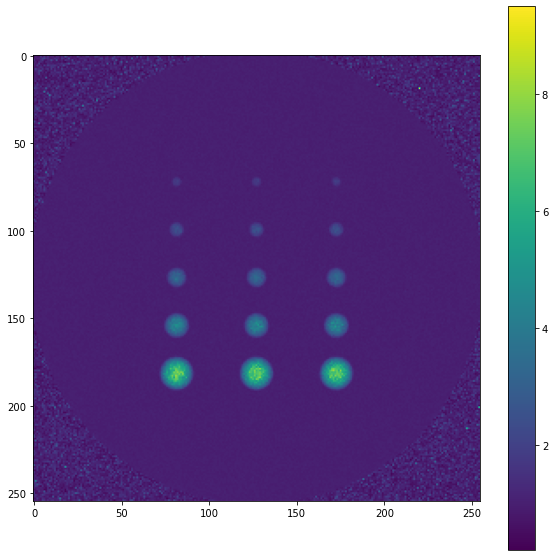

In [15]:
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-0-Dose.mhd', sitk.sitkFloat32))
#imagen_GATE_dosis = ct_scans[0]+0.00000000001
imagen_GATE_dosis = ct_scans[0]
ct_scansBase = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-0-Dose.mhd' , sitk.sitkFloat32))
imagen_GATE_dosisBase = ct_scansBase[0]

imagen_GATE_dosis= imagen_GATE_dosisBase/imagen_GATE_dosis
#imagen_GATE_dosis= imagen_GATE_dosis/np.max(imagen_GATE_dosis)
#imagen_GATE_dosis= imagen_GATE_dosisBase
#imagen_GATE_dosis= imagen_GATE_dosis<1

fig = plt.figure(figsize=(10,10))
plt.imshow(imagen_GATE_dosis,cmap='viridis')
plt.colorbar()

In [ ]:
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile10-2-Dose.mhd', sitk.sitkFloat32))